<a href="https://colab.research.google.com/github/GurashishJuneja/MMAI-891-NLP-Project/blob/main/Gurashish_Juneja_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries

In [2]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 106.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from pathlib import Path
from google.colab import drive
import os

import re
import string

# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

In [4]:
import locale
print(locale.getpreferredencoding())
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

UTF-8


In [5]:
# Mount Google Drive
drive.mount('/content/drive')

# Set the directory to your specific folder in Google Drive
folder_path = "/content/drive/MyDrive/Colab Notebooks/NLP"

if os.path.exists(folder_path):
  files = os.listdir(folder_path)
  print(files)
else:
  print("Director does not exist")

root_dir ="/content/drive/My Drive/"

project_folder = "Colab Notebooks/NLP"
os.chdir(root_dir + project_folder)
!pwd






Mounted at /content/drive
['Test.csv', 'Train.csv']
/content/drive/My Drive/Colab Notebooks/NLP


In [6]:
#Loading data

train = pd.read_csv("Train.csv").dropna(0)
test = pd.read_csv("Test.csv").fillna('')

<ipython-input-6-e9aaa344eceb>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  train = pd.read_csv("Train.csv").dropna(0)


In [7]:
train.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [8]:
test.head()

,tweet_id,safe_text
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."


In [9]:
test["label"] =0

In [10]:
test.head()

,tweet_id,safe_text,label
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...,0
1,00UNMD0E,Students starting school without whooping coug...,0
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe...",0
3,01HOEQJW,How many innocent children die for lack of vac...,0
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though...",0


In [11]:
train.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [12]:
#Understanding the dataset

In [13]:
train["safe_text"].apply(lambda x: len(x)).describe()

count    9999.000000
mean       99.921092
std        29.868721
min         3.000000
25%        80.000000
50%       107.000000
75%       122.000000
max       153.000000
Name: safe_text, dtype: float64

In [14]:
#Goal is to identify if the sentiment of the tweet is positive, negative or neutral

In [15]:
#Data Cleaning

In [16]:
train["label"].value_counts()

 0.0    4908
 1.0    4053
-1.0    1038
Name: label, dtype: int64

In [17]:
train.isnull().sum()

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64

In [18]:
test.isnull().sum()

tweet_id     0
safe_text    0
label        0
dtype: int64

In [19]:
train.isnull().sum()

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64

In [20]:
train.dropna(inplace = True)

In [21]:
#No missing values


In [22]:
"""def multiclass_logloss(actual, predicted, eps = 1e-15):

  if len(actual.shape) == 1:
    actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
    for i, val in enumerate(actual):
      actual2[i, val] = 1
    actual = actual2


clip = np.clip(predicted,eps, 1-eps)
rows = actual.shape[0]
vsota = np.sum(actual*np.log(clip))
return - 1.0 / rows*vsota"""

'def multiclass_logloss(actual, predicted, eps = 1e-15):\n\n  if len(actual.shape) == 1:\n    actual2 = np.zeros((actual.shape[0], predicted.shape[1]))\n    for i, val in enumerate(actual):\n      actual2[i, val] = 1\n    actual = actual2\n\n\nclip = np.clip(predicted,eps, 1-eps)\nrows = actual.shape[0]\nvsota = np.sum(actual*np.log(clip))\nreturn - 1.0 / rows*vsota'

In [23]:
#Saw this online, but it did not work. 

Data Exploration

In [24]:
print(train.shape)

(9999, 4)


In [25]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   9999 non-null   object 
 1   safe_text  9999 non-null   object 
 2   label      9999 non-null   float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB
None


In [26]:
print(train.tail())

       tweet_id                                          safe_text  label  \
9996   IU0TIJDI  Living in a time where the sperm I used to was...    1.0   
9997   WKKPCJY6  <user> <user>  In spite of all measles outbrea...    1.0   
9998   ST3A265H  Interesting trends in child immunization in Ok...    0.0   
9999   6Z27IJGD  CDC Says Measles Are At Highest Levels In Deca...    0.0   
10000  P6190L3Q  Pneumonia vaccine: for women w risk of pulmona...    1.0   

       agreement  
9996    1.000000  
9997    0.666667  
9998    1.000000  
9999    1.000000  
10000   0.666667  


In [27]:
train.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [28]:
print(train.describe())

            label    agreement
count  9999.00000  9999.000000
mean      0.30153     0.854252
std       0.64674     0.180707
min      -1.00000     0.333333
25%       0.00000     0.666667
50%       0.00000     1.000000
75%       1.00000     1.000000
max       1.00000     1.000000


In [29]:
print(train["tweet_id"].value_counts())

CL1KWCMY    1
5B8M8HTE    1
H0AR80GW    1
LYW13M4I    1
LENUYCR7    1
           ..
TI4XPTJA    1
S3HH6W8D    1
EF6HU81M    1
GZWQLREU    1
P6190L3Q    1
Name: tweet_id, Length: 9999, dtype: int64


In [30]:
print(train["label"].value_counts())

 0.0    4908
 1.0    4053
-1.0    1038
Name: label, dtype: int64


In [31]:
#Trying to visualize the dataset

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

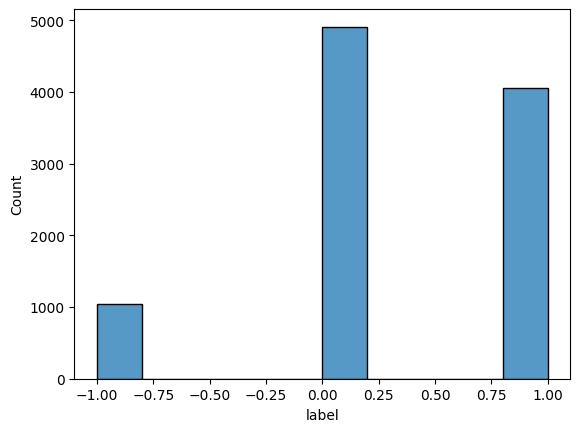

In [33]:
sns.histplot(train["label"], kde = False, bins = 10)
plt.show()

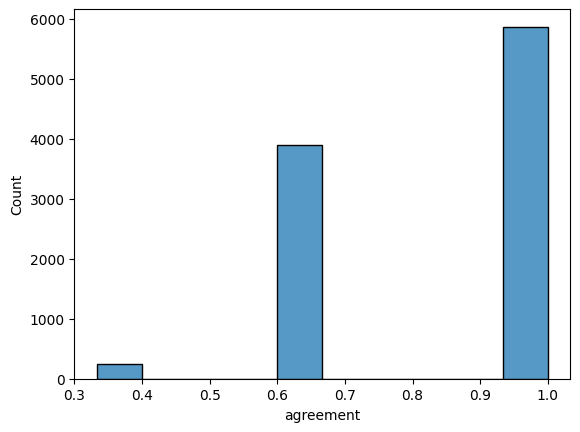

In [34]:
sns.histplot(train["agreement"], kde = False, bins = 10)
plt.show()

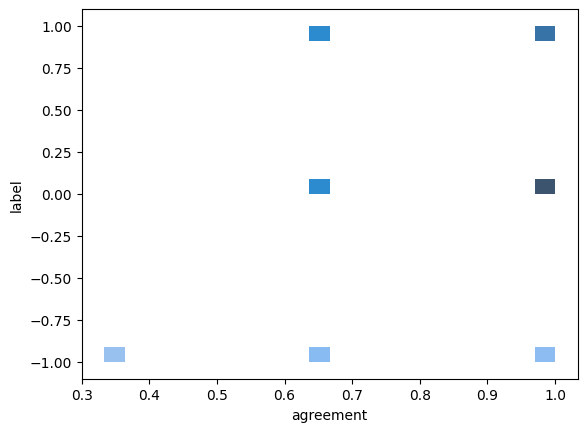

In [35]:
sns.histplot(x = "agreement", y = "label", data = train)
plt.show()

<ipython-input-36-08b3a86a47d5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True)


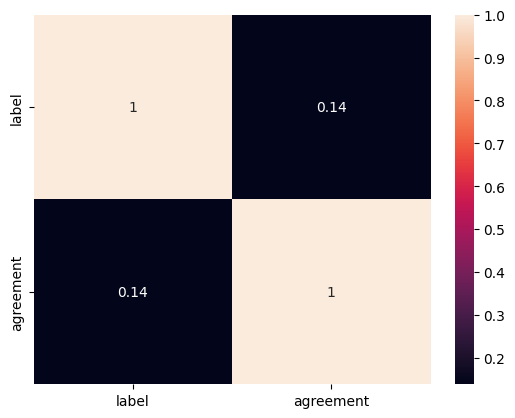

In [36]:
sns.heatmap(train.corr(), annot = True)
plt.show()

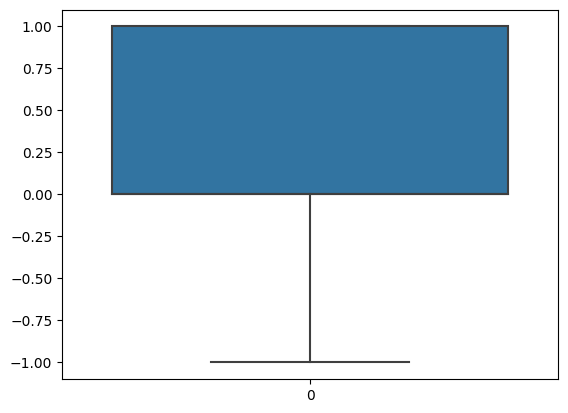

In [37]:
sns.boxplot(train["label"])
plt.show()

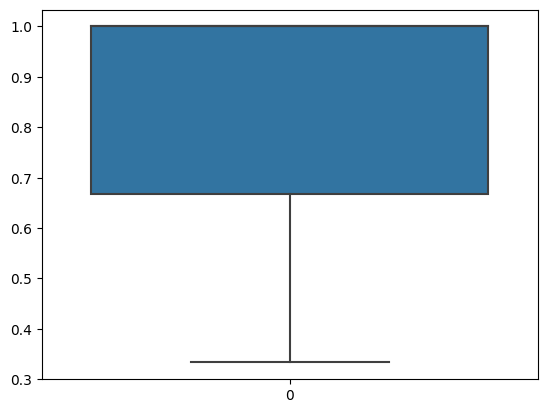

In [38]:
sns.boxplot(train["agreement"])
plt.show()

In [39]:
print(train.corr())

              label  agreement
label      1.000000   0.138155
agreement  0.138155   1.000000


<ipython-input-39-b4277a5a91ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train.corr())


Data Preprocessing

In [40]:
import re
import string
import nltk
import unicodedata

nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [41]:
#Checking train dataset before data preprocessing steps

train.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [42]:
def clean_text(text):
  #Converting text to lowercase

  text = text.lower()

  #Removing HTL tags using regular expression

  text = re.sub("<[^>]*>", "", text)

  #Removing punctuation and special characters

  text = text.translate(str.maketrans("","",string.punctuation))

  #Remove numbers

  text = re.sub('\d+', "", text)

  #Stemming

  ps = PorterStemmer()
  words = nltk.word_tokenize(text)
  stemmed_words = [ps.stem(word) for word in words]
  text = " ".join(stemmed_words)

  #Normalizing text

  text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8","ignore")

  return text


  #Removing stopwords

  stop_words = set(stopwords.words("english"))
  words = nltk.word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in stop_words]
  text = " ".join(filtered_words)


  Used this code to remove stopwords, but parts of the text were removed. Not what I was looking for. 

In [43]:
def remove_urls(text):
  url_pattern = re.compile(r"https?://\S+|www\.S+")

  return url_pattern.sub("",text)

In [44]:
def remove_email_addresses(text):
  email_pattern = re.compile(r"\S+@|S+")

  return email_pattern.sub("",text)

In [45]:
from textblob import TextBlob

def correct_spelling(text):

  blob = TextBlob(text)
  return str(blob.correct())

In [46]:
#Applying these functions to test and training datasets


train["safe_text"] = train["safe_text"].apply(lambda x: clean_text(x))
train["safe_text"] = train["safe_text"].apply(lambda x: remove_urls(x))
train["safe_text"] = train["safe_text"].apply(lambda x: remove_email_addresses(x))
train["safe_text"] = train["safe_text"].apply(lambda x: correct_spelling(x))


0    me amp the big home meanly meanly mb mb mr ste...
1    in think of devote my career to prove cutis is...
2      whatcausesaut vaccine do not vaccine your child
3    i mean if they immune my kid with cometh that ...
4    thank to catch me perform at la suit ny st ave...
Name: safe_text, dtype: object

In [65]:
"""# Removing rare words

from collections import Counter

def remove_rare_words(text, threshold =2):

  words = text.split()
  word_counts = Counter(words)


  filtered_words = [word for word in words if word in word_frequencies]
  return ' '.join(filtered_words)"""

"# Removing rare words\n\nfrom collections import Counter\n\ndef remove_rare_words(text, threshold =2):\n\n  words = text.split()\n  word_counts = Counter(words)\n\n\n  filtered_words = [word for word in words if word in word_frequencies]\n  return ' '.join(filtered_words)"

In [66]:
#The above was giving me a hard time, hence did not end up running it. 

In [71]:
#Part of speech tagging

import nltk
nltk.download('averaged_perceptron_tagger')


def pos_tagging(text):
  tagged_text = []
  for text in text:
    tokens = nltk.word_tokenize(text)
    tagged_text = nltk.pos_tag(tokens)
    tagged_text.append(tagged_text)

  return tagged_text



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [72]:
import spacy

nlp = spacy.load("en_core_web_sm")

def ner(text):
  doc = nlp(text)
  entities = [(entity.text, entity.label_)for entity in doc.ents]
  return entities

In [73]:
def remove_stopwords(text):

  "Removing stopwords in the English language"

  words = [w for w in text if w not in stopwords.words("english")]
  return words

In [75]:
"""
train["safe_text"] = train["safe_text"].apply(lambda x: pos_tagging(x))
train["safe_text"] = train["safe_text"].apply(lambda x: ner(x))
train["safe_text"] = train["safe_text"].apply(lambda x: remove_stopwords(x))
"""

'\ntrain["safe_text"] = train["safe_text"].apply(lambda x: pos_tagging(x))\ntrain["safe_text"] = train["safe_text"].apply(lambda x: ner(x))\ntrain["safe_text"] = train["safe_text"].apply(lambda x: remove_stopwords(x))\n'